 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [235]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [236]:
# Reading whale returns
whale_returns_csv = Path("Resources/WhalePortfolio/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending=True, inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [237]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [238]:
# Drop nulls
num_nulls_before = whale_returns.isnull().sum().sum()
whale_returns.dropna(inplace=True)
num_nulls_after = whale_returns.isnull().sum().sum()
print()
print(f"Number of nulls before: {num_nulls_before}  ->  Number of nulls after: {num_nulls_after}")
print()
whale_returns.head()


Number of nulls before: 4  ->  Number of nulls after: 0



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [239]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/AlgorithmicPortfolios/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True, inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [240]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [241]:
# Drop nulls
num_nulls_before = algo_returns.isnull().sum().sum()
algo_returns.dropna(inplace=True)
num_nulls_after = algo_returns.isnull().sum().sum()
print()
print(f"Number of nulls before: {num_nulls_before}  ->  Number of nulls after: {num_nulls_after}")
print()
algo_returns.head()


Number of nulls before: 6  ->  Number of nulls after: 0



,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [242]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/StockIndices/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending=True, inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [243]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [244]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace('$','').astype("float")
print(sp500_history.dtypes)
sp500_history.head()

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [245]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [246]:
# Drop nulls
num_nulls_before = sp500_daily_returns.isnull().sum().sum()
sp500_daily_returns.dropna(inplace=True)
num_nulls_after = sp500_daily_returns.isnull().sum().sum()
print()
print(f"Number of nulls before: {num_nulls_before}  ->  Number of nulls after: {num_nulls_after}")
print()
sp500_daily_returns.head()


Number of nulls before: 1  ->  Number of nulls after: 0



,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [247]:
# Rename Column
sp500_daily_returns.columns = [ "S&P 500" ]
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [248]:
# Concatenate all DataFrames into a single DataFrame
daily_returns = pd.concat([ whale_returns, algo_returns, sp500_daily_returns ], axis="columns", join="inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

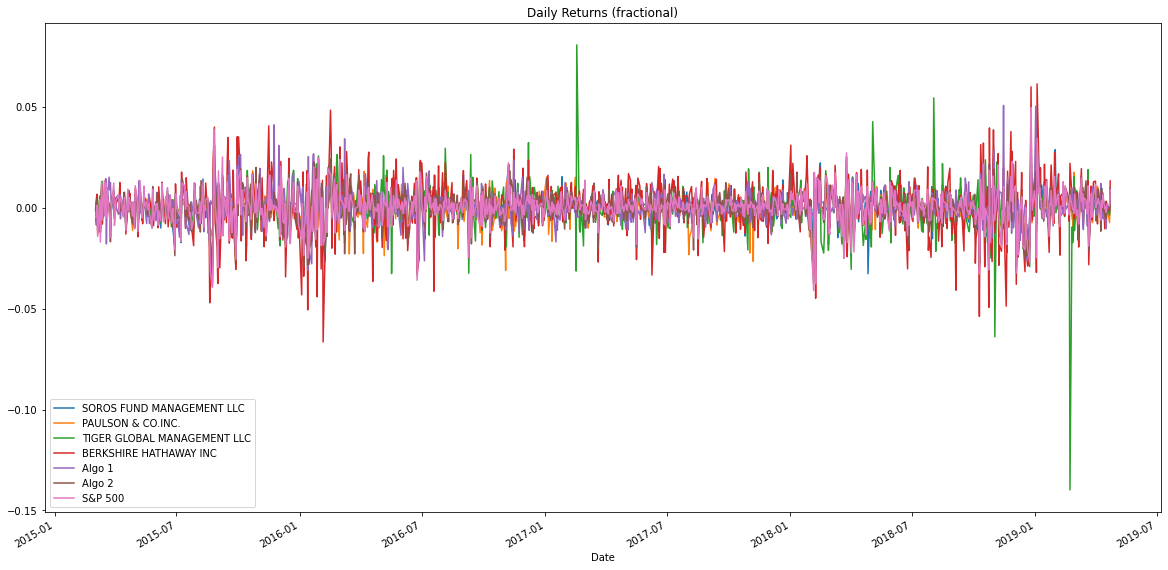

In [249]:
# Plot daily returns
daily_returns.plot(kind='line', figsize=(20, 10), title="Daily Returns (fractional)")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


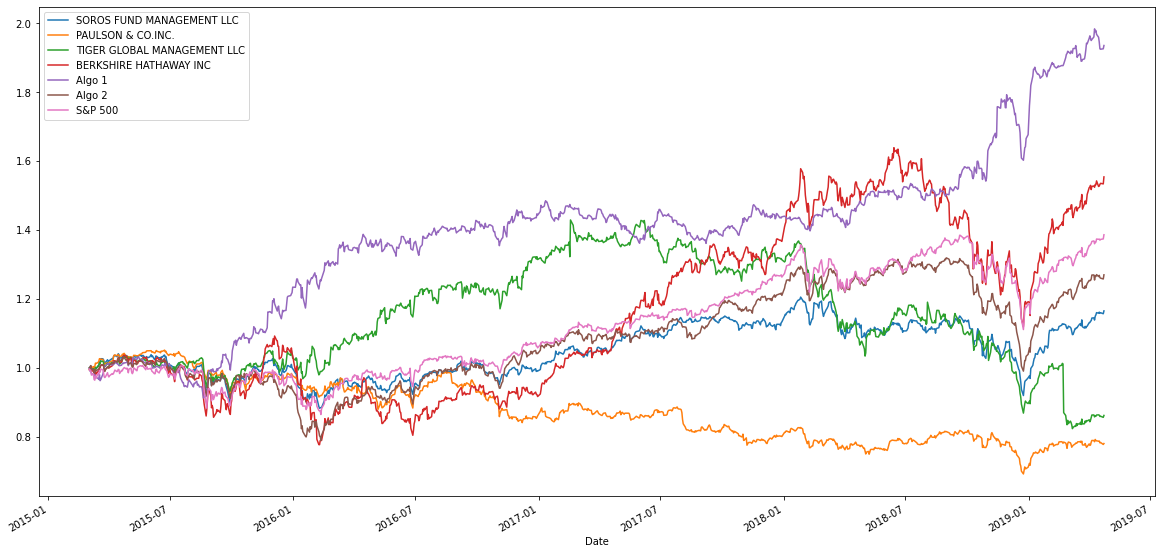

In [250]:
# Plot cumulative returns

#cumu=dr.cumsum(axis=0,skipna=True)

# TODO ensure adding and multiplying percentages works.

cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(kind='line', figsize=(20, 10))
cumulative_returns.head()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

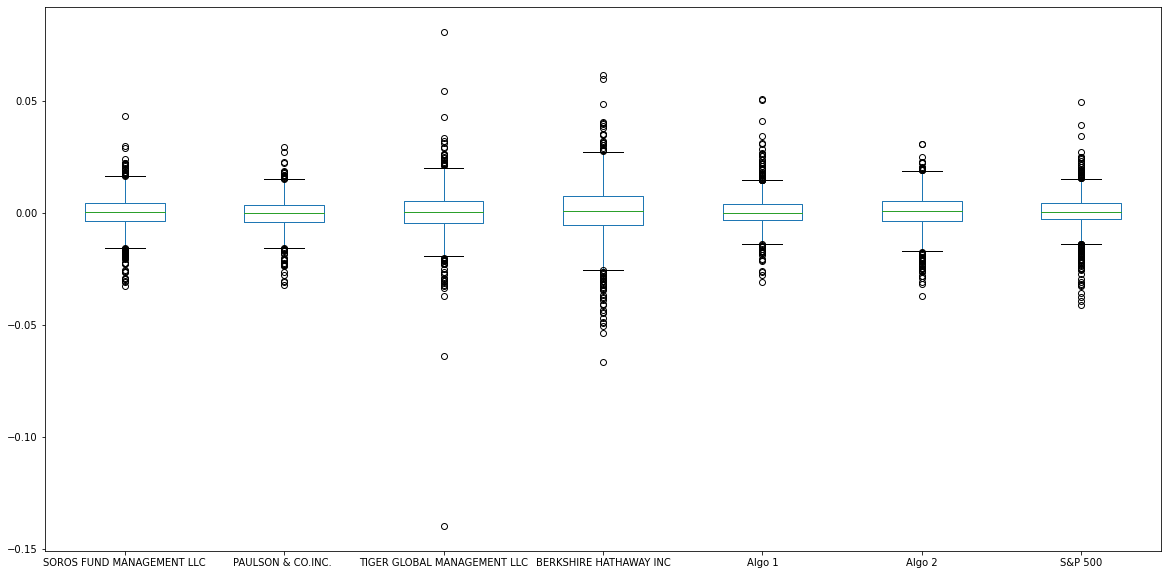

In [251]:
# Box plot to visually show risk
daily_returns.plot(kind='box', figsize=(20, 10))
# TODO How can this box be described??

In [252]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

#daily_returns_std = daily_returns.std()

daily_returns_std = pd.DataFrame(daily_returns.std())
daily_returns_std.columns = ["STD"]
daily_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [253]:
# Determine which portfolios are riskier than the S&P 500
#daily_returns_std.loc(daily_returns_std > daily_returns_std[0])
#riskiest = daily_returns_std[daily_returns_std["STD"] > daily_returns_std.loc["S&P 500", "STD"]]
riskiest = daily_returns_std.loc[daily_returns_std["STD"] > daily_returns_std.loc["S&P 500", "STD"]]
riskiest

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [254]:
# Calculate the annualized standard deviation (252 trading days)
annualized_daily_returns_std = daily_returns_std * np.sqrt(252)
annualized_daily_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

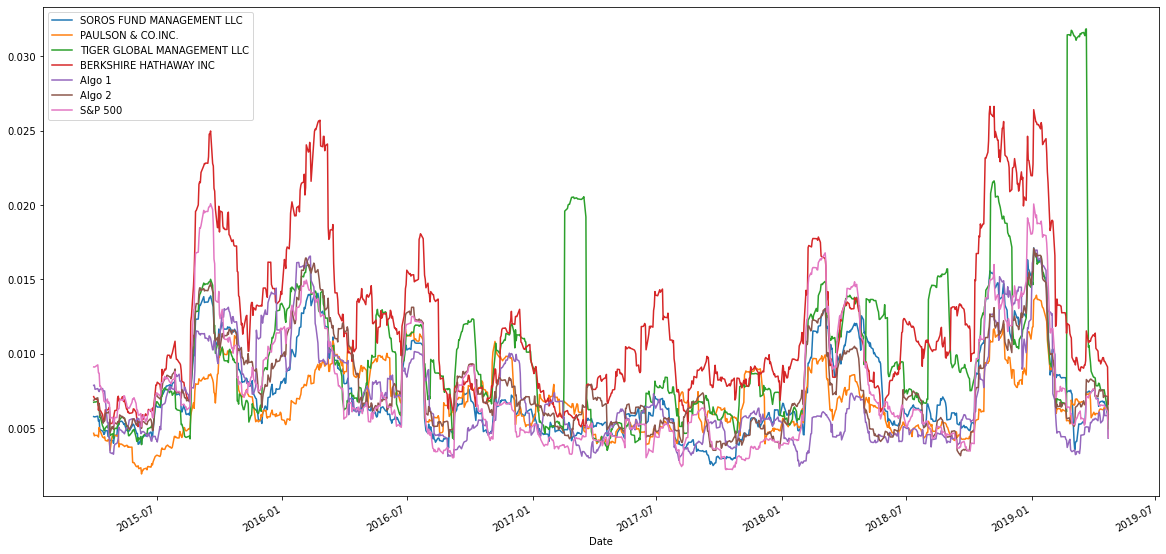

In [255]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
daily_returns.rolling(window=21).std().plot(kind='line', figsize=(20, 10))

In [256]:
# Construct a correlation table
correlation = daily_returns.corr()
print("Algo 2 has the highest correlation with S&P 500.")
correlation

# TODO Extract, sort, list correlations

Algo 2 has the highest correlation with S&P 500.


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


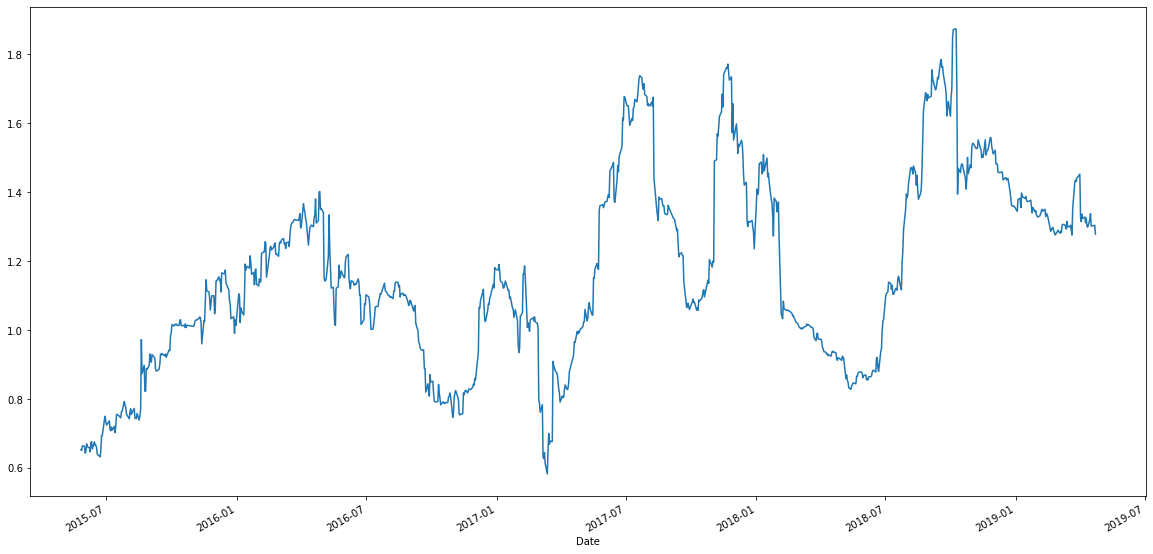

In [257]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance_berkshire = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(daily_returns["S&P 500"])
variance_berkshire = daily_returns["S&P 500"].rolling(window = 60).var()
beta_berkshire = covariance_berkshire / variance_berkshire
beta_berkshire.plot(kind='line', figsize=(20, 10))

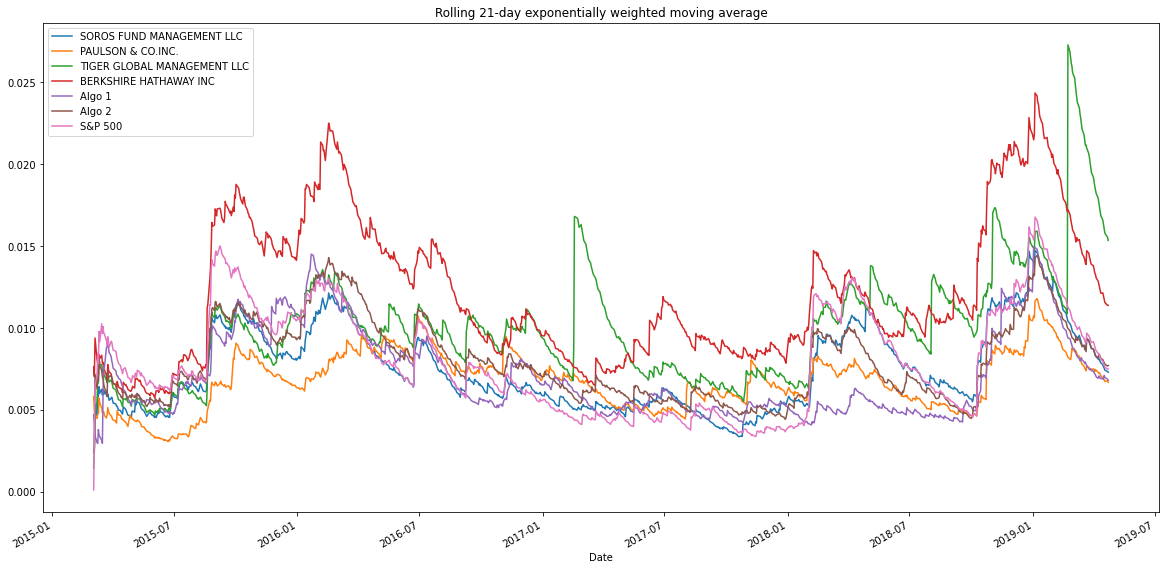

In [258]:
# Calculate a rolling window using the exponentially weighted moving average. 

#covariance_berkshire_exponential = daily_returns["BERKSHIRE HATHAWAY INC"].ewm(halflife = 21).cov(daily_returns["S&P 500"])
#variance_berkshire_exponential = daily_returns["S&P 500"].ewm(halflife = 21).var()
##variance_berkshire_exponential = daily_returns["BERKSHIRE HATHAWAY INC"].ewm(halflife = 21).var()
#beta_berkshire_exponential = covariance_berkshire_exponential / variance_berkshire_exponential
#beta_berkshire_exponential.plot(kind='line', figsize=(20, 10))


daily_returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Rolling 21-day exponentially weighted moving average")

# TODO incorrect results.


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [259]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

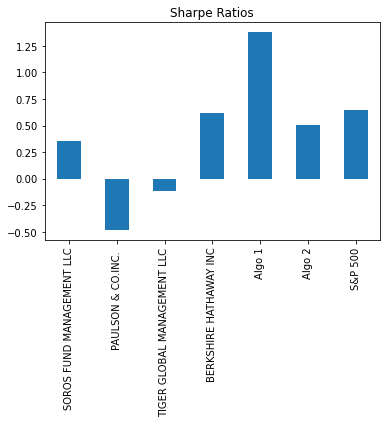

In [260]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# TODO ask about <matplotlib.axes._subplots.AxesSubplot at 0x1ea9bcbb9a0> - not showing for others.

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Based on the Sharpe ratio, Algo 1 vastly out-performs the S&P 500. However Algo 2 underperforms the S&P 500. The results for other portfolios are a mixed bag, with several slightly below the S&P 500 and two with negative Sharpe Ratio values.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [261]:
# Read the first stock
faang_portfolio_fb_filepath = Path("Resources/FAANG_Portfolio/FB.csv")
faang_portfolio_fb = pd.read_csv(faang_portfolio_fb_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
faang_portfolio_fb.sort_index(ascending=True, inplace=True)
print(faang_portfolio_fb.head())

             Close
Date              
2018-01-02  181.42
2018-01-03  184.67
2018-01-04  184.33
2018-01-05  186.85
2018-01-08  188.28


In [262]:
# Read the second stock
faang_portfolio_amzn_filepath = Path("Resources/FAANG_Portfolio/AMZN.csv")
faang_portfolio_amzn = pd.read_csv(faang_portfolio_amzn_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
faang_portfolio_amzn.sort_index(ascending=True, inplace=True)
print(faang_portfolio_amzn.head())

              Close
Date               
2018-01-02  1189.01
2018-01-03  1204.20
2018-01-04  1209.59
2018-01-05  1229.14
2018-01-08  1246.87


In [263]:
# Read the third stock
faang_portfolio_aapl_filepath = Path("Resources/FAANG_Portfolio/AAPL.csv")
faang_portfolio_aapl = pd.read_csv(faang_portfolio_aapl_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
faang_portfolio_aapl.sort_index(ascending=True, inplace=True)
print(faang_portfolio_aapl.head())

# Reading additional stock
faang_portfolio_nflx_filepath = Path("Resources/FAANG_Portfolio/NFLX.csv")
faang_portfolio_nflx = pd.read_csv(faang_portfolio_nflx_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
faang_portfolio_nflx.sort_index(ascending=True, inplace=True)
print(faang_portfolio_nflx.head())

# Reading additional stock
faang_portfolio_googl_filepath = Path("Resources/FAANG_Portfolio/GOOGL.csv")
faang_portfolio_googl = pd.read_csv(faang_portfolio_googl_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
faang_portfolio_googl.sort_index(ascending=True, inplace=True)
print(faang_portfolio_googl.head())

            Close
Date             
2018-01-02  43.07
2018-01-03  43.06
2018-01-04  43.26
2018-01-05  43.75
2018-01-08  43.59
             Close
Date              
2018-01-02  201.07
2018-01-03  205.05
2018-01-04  205.63
2018-01-05  209.99
2018-01-08  212.05
              Close
Date               
2018-01-02  1073.21
2018-01-03  1091.52
2018-01-04  1095.76
2018-01-05  1110.29
2018-01-08  1114.21


In [264]:
# Concatenate all stocks into a single DataFrame
faang_portfolio_prices = pd.concat([faang_portfolio_fb, faang_portfolio_amzn, faang_portfolio_aapl, faang_portfolio_nflx, faang_portfolio_googl], axis="columns", join="inner")

# Assign column names
faang_portfolio_prices.columns = ["FB", "AMZN", "AAPL", "NFLX", "GOOGL"]

# Remove timestamp
# TODO
#faang_portfolio_prices.reset_index()
#faang_portfolio_prices.index.year
##faang_portfolio_prices
##faang_portfolio_prices.loc["Date"]
##faang_portfolio_prices["Date"]


faang_portfolio_prices.head()

,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2018-01-02,181.42,1189.01,43.07,201.07,1073.21
2018-01-03,184.67,1204.20,43.06,205.05,1091.52
2018-01-04,184.33,1209.59,43.26,205.63,1095.76
2018-01-05,186.85,1229.14,43.75,209.99,1110.29
2018-01-08,188.28,1246.87,43.59,212.05,1114.21


In [265]:
# Reset the index
faang_portfolio_prices.reset_index()

,Date,FB,AMZN,AAPL,NFLX,GOOGL
0,2018-01-02,181.42,1189.01,43.07,201.07,1073.21
1,2018-01-03,184.67,1204.20,43.06,205.05,1091.52
2,2018-01-04,184.33,1209.59,43.26,205.63,1095.76
3,2018-01-05,186.85,1229.14,43.75,209.99,1110.29
4,2018-01-08,188.28,1246.87,43.59,212.05,1114.21
...,...,...,...,...,...,...
694,2020-10-05,264.65,3199.20,116.50,520.65,1482.83
695,2020-10-06,258.66,3099.96,113.16,505.87,1451.02
696,2020-10-07,258.12,3195.69,115.08,534.66,1459.14
697,2020-10-08,263.76,3190.55,114.97,531.79,1483.43


In [266]:
# Pivot so that each column of prices represents a unique symbol
# TODO Ask how this is different from concatenated
faang_portfolio_prices_table = faang_portfolio_prices.pivot_table(index="Date")
faang_portfolio_prices_table.sort_index(ascending=True, inplace=True)
faang_portfolio_prices_table.head()

,AAPL,AMZN,FB,GOOGL,NFLX
Date,,,,,
2018-01-02,43.07,1189.01,181.42,1073.21,201.07
2018-01-03,43.06,1204.20,184.67,1091.52,205.05
2018-01-04,43.26,1209.59,184.33,1095.76,205.63
2018-01-05,43.75,1229.14,186.85,1110.29,209.99
2018-01-08,43.59,1246.87,188.28,1114.21,212.05


In [267]:
# Drop nulls
num_nulls_before = faang_portfolio_prices_table.isnull().sum().sum()
faang_portfolio_prices_table.dropna(inplace=True)
num_nulls_after = faang_portfolio_prices_table.isnull().sum().sum()
print()
print(f"Number of nulls before: {num_nulls_before}  ->  Number of nulls after: {num_nulls_after}")
print()
faang_portfolio_prices_table.head()


Number of nulls before: 0  ->  Number of nulls after: 0



,AAPL,AMZN,FB,GOOGL,NFLX
Date,,,,,
2018-01-02,43.07,1189.01,181.42,1073.21,201.07
2018-01-03,43.06,1204.20,184.67,1091.52,205.05
2018-01-04,43.26,1209.59,184.33,1095.76,205.63
2018-01-05,43.75,1229.14,186.85,1110.29,209.99
2018-01-08,43.59,1246.87,188.28,1114.21,212.05


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [268]:
# Calculate weighted portfolio returns
num_stocks = len(faang_portfolio_prices_table.columns)
# TODO make adjustable
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

print()

faang_portfolio_unweighted_returns = faang_portfolio_prices_table.pct_change()
print("FAANG Portfolio Unweighted Returns")
print("--------------------------------")
print(faang_portfolio_unweighted_returns.head())

print()

faang_portfolio_weighted_returns = pd.DataFrame(faang_portfolio_unweighted_returns.dot(weights))
faang_portfolio_weighted_returns.columns = ["FAANG Portfolio"]
print("FAANG Portfolio Weighted Returns")
print("--------------------------------")
print(faang_portfolio_weighted_returns.head())


FAANG Portfolio Unweighted Returns
--------------------------------
                AAPL      AMZN        FB     GOOGL      NFLX
Date                                                        
2018-01-02       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.000232  0.012775  0.017914  0.017061  0.019794
2018-01-04  0.004645  0.004476 -0.001841  0.003884  0.002829
2018-01-05  0.011327  0.016163  0.013671  0.013260  0.021203
2018-01-08 -0.003657  0.014425  0.007653  0.003531  0.009810

FAANG Portfolio Weighted Returns
--------------------------------
            FAANG Portfolio
Date                       
2018-01-02              NaN
2018-01-03         0.013462
2018-01-04         0.002799
2018-01-05         0.015125
2018-01-08         0.006352


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [269]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_portfolios_daily_returns = pd.concat([daily_returns, faang_portfolio_weighted_returns], axis="columns", join="inner")
all_portfolios_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,FAANG Portfolio
Date,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.008303,NaN
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.013462
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.002799
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.015125
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.006352
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008050
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.002695
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003231


In [270]:
# Drop nulls
num_nulls_before = all_portfolios_daily_returns.isnull().sum().sum()
all_portfolios_daily_returns.dropna(inplace=True)
num_nulls_after = all_portfolios_daily_returns.isnull().sum().sum()
print()
print(f"Number of nulls before: {num_nulls_before}  ->  Number of nulls after: {num_nulls_after}")
print()
all_portfolios_daily_returns.head()


Number of nulls before: 1  ->  Number of nulls after: 0



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,FAANG Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.013462
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.002799
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.015125
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.006352
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,-0.002385


In [271]:
# Confirm nulls have been dropped
all_portfolios_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
FAANG Portfolio                0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others



All portfolios daily returns
----------------------------

                                  STD
SOROS FUND MANAGEMENT LLC    0.009486
PAULSON & CO.INC.            0.007383
TIGER GLOBAL MANAGEMENT LLC  0.014023
BERKSHIRE HATHAWAY INC       0.014726
Algo 1                       0.007670
Algo 2                       0.008836
S&P 500                      0.010175
FAANG Portfolio              0.017773


All portfolios riskiest
-----------------------

                                  STD
TIGER GLOBAL MANAGEMENT LLC  0.014023
BERKSHIRE HATHAWAY INC       0.014726
FAANG Portfolio              0.017773


All portfolios annualized standard deviation
--------------------------------------------

                                  STD
SOROS FUND MANAGEMENT LLC    0.150585
PAULSON & CO.INC.            0.117206
TIGER GLOBAL MANAGEMENT LLC  0.222603
BERKSHIRE HATHAWAY INC       0.233767
Algo 1                       0.121751
Algo 2                       0.140271
S&P 500                      0.1615

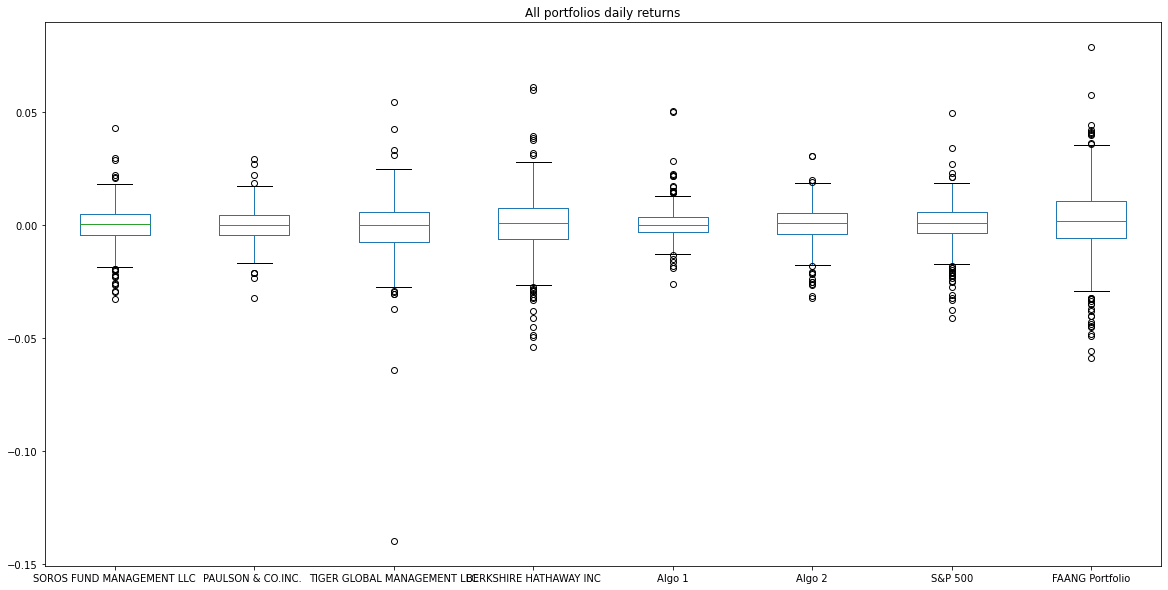

In [272]:
# Risk

## Returns box plot
all_portfolios_daily_returns.plot(kind='box', figsize=(20, 10), title="All portfolios daily returns")

## Standard deviations
all_portfolios_daily_returns_std = pd.DataFrame(all_portfolios_daily_returns.std())
all_portfolios_daily_returns_std.columns = ["STD"]
print()
print()
print("All portfolios daily returns")
print("----------------------------")
print()
print(all_portfolios_daily_returns_std)

## Determine which portfolios are riskier than the S&P 500
riskiest = all_portfolios_daily_returns_std.loc[all_portfolios_daily_returns_std["STD"] > all_portfolios_daily_returns_std.loc["S&P 500", "STD"]]

print()
print()
print("All portfolios riskiest")
print("-----------------------")
print()
print(riskiest)


## Calculate the annualized standard deviation (252 trading days)
annualized_all_portfolios_daily_returns_std = all_portfolios_daily_returns_std * np.sqrt(252)
print()
print()
print("All portfolios annualized standard deviation")
print("--------------------------------------------")
print()
print(annualized_all_portfolios_daily_returns_std)

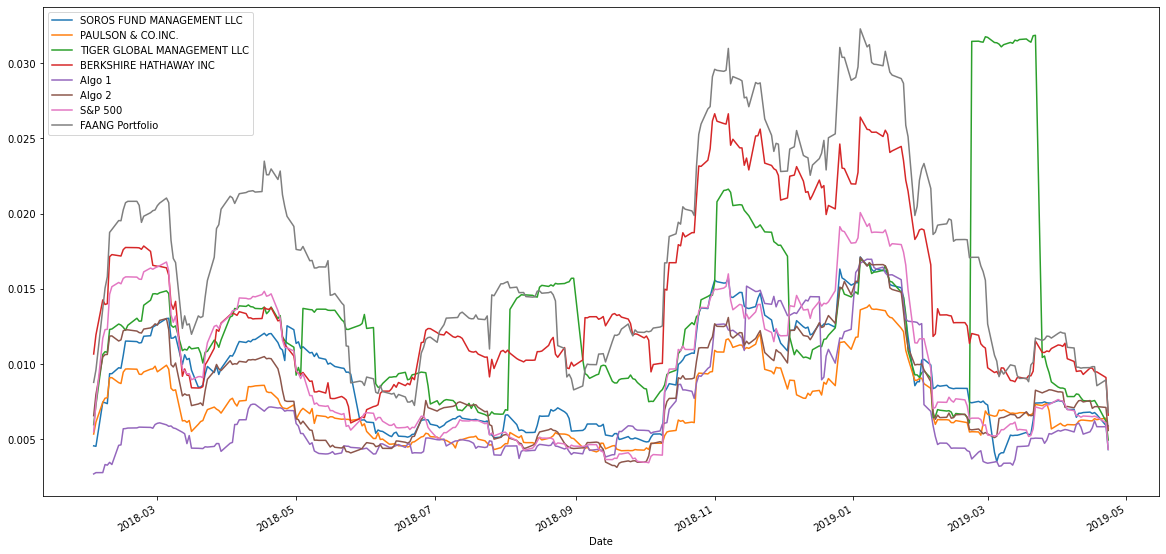

In [273]:
# 21-day rolling standard deviation
all_portfolios_daily_returns.rolling(window=21).std().plot(kind='line', figsize=(20, 10))

In [274]:
# Annualized Sharpe Ratios
all_portfolios_sharpe_ratios = (all_portfolios_daily_returns.mean() * 252) / (all_portfolios_daily_returns.std() * np.sqrt(252))

print("All portfolios annualized sharpe ratios")
print("---------------------------------------")
all_portfolios_sharpe_ratios


All portfolios annualized sharpe ratios
---------------------------------------


SOROS FUND MANAGEMENT LLC      0.143496
PAULSON & CO.INC.             -0.209302
TIGER GLOBAL MANAGEMENT LLC   -1.327618
BERKSHIRE HATHAWAY INC         0.439395
Algo 1                         1.932709
Algo 2                         0.240768
S&P 500                        0.484234
FAANG Portfolio                1.030764
dtype: float64

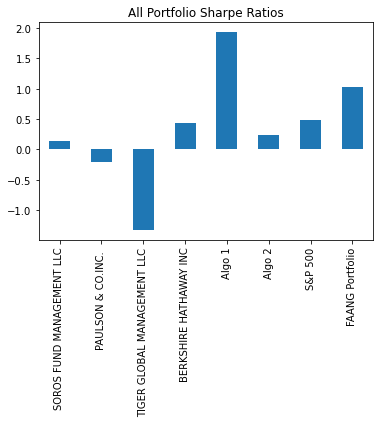

In [275]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe_ratios.plot(kind="bar", title="All Portfolio Sharpe Ratios")

In [276]:
# Create a correlation analysis
all_portfolios_correlation = all_portfolios_daily_returns.corr()
all_portfolios_correlation.style.background_gradient(cmap="viridis")

# TODO Extract, sort, list correlations
# Make consistent with earlier correlation presentation.
#all_portfolios_correlation.iloc[all_portfolios_correlation < 1]
##riskiest = all_portfolios_daily_returns_std.loc[all_portfolios_daily_returns_std["STD"] > all_portfolios_daily_returns_std.loc["S&P 500", "STD"]]


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,FAANG Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.776507,0.528789,0.794609,0.330594,0.840760,0.849601,0.754525
PAULSON & CO.INC.,0.776507,1.000000,0.537938,0.664404,0.341950,0.805066,0.790232,0.656320
TIGER GLOBAL MANAGEMENT LLC,0.528789,0.537938,1.000000,0.390582,0.144345,0.489538,0.566628,0.418668
BERKSHIRE HATHAWAY INC,0.794609,0.664404,0.390582,1.000000,0.316841,0.793788,0.843673,0.879321
Algo 1,0.330594,0.341950,0.144345,0.316841,1.000000,0.341346,0.280197,0.311436
Algo 2,0.840760,0.805066,0.489538,0.793788,0.341346,1.000000,0.887061,0.760120
S&P 500,0.849601,0.790232,0.566628,0.843673,0.280197,0.887061,1.000000,0.844133
FAANG Portfolio,0.754525,0.656320,0.418668,0.879321,0.311436,0.760120,0.844133,1.000000


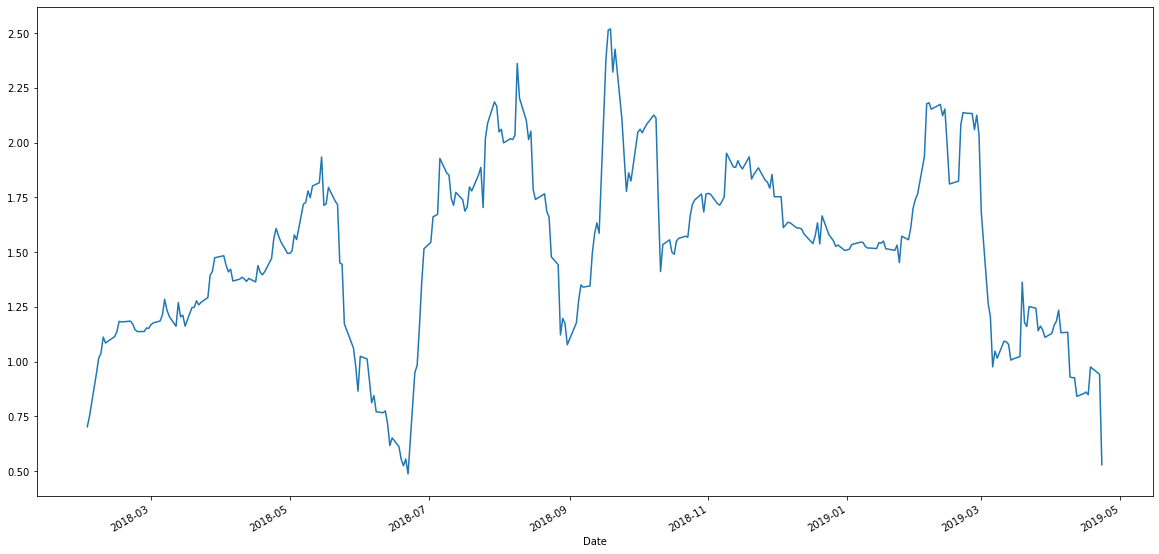

In [277]:
# Beta
## Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance_faang = all_portfolios_daily_returns["FAANG Portfolio"].rolling(window = 21).cov(daily_returns["S&P 500"])
variance_faang = all_portfolios_daily_returns["S&P 500"].rolling(window = 21).var()
beta_faang = covariance_faang / variance_faang
beta_faang.plot(kind='line', figsize=(20, 10))

# TODO compare beta plots

In [278]:
print("Analysis")
print("----------")
print()
print("STD: The standard deviation of the FAANG Portfolio is consistently larger than that of all other portfolios, causing the portfolio value to fluctuate more strongly.")
print("Sharpe Ratio: With the highest non-algorithmic Sharpe Ratio, the FAANG portfolio stands to provide one of the best investment risk/reward ratios.")
print("Correlation: The ")
print("Beta: The ")
print()
print()
print("Conclusion: ...")
print()


## Plot exponentially-weighted standard deviation
#all_portfolios_daily_returns.ewm(halflife=21).std().plot()



## Calculate Beta for a single portfolio compared to the total market (S&P 500)
#covariance = all_portfolios_daily_returns.rolling(window = 21).cov(daily_returns["S&P 500"])
#variance = all_portfolios_daily_returns["S&P 500"].rolling(window = 21).var()
#beta = covariance / variance
#beta.plot(kind='line', figsize=(20, 10))
print()

Analysis
----------

STD: The standard deviation of the FAANG Portfolio is consistently larger than that of all other portfolios, causing the portfolio value to fluctuate more strongly.
Sharpe Ratio: With the highest non-algorithmic Sharpe Ratio, the FAANG portfolio stands to provide one of the best investment risk/reward ratios.
Correlation: The 
Beta: The 


Conclusion: ...




Initial investment: 100000  Final value:


SOROS FUND MANAGEMENT LLC      116456.761705
PAULSON & CO.INC.               77964.633711
TIGER GLOBAL MANAGEMENT LLC     86118.913151
BERKSHIRE HATHAWAY INC         155340.132929
Algo 1                         193469.102636
Algo 2                         126924.714811
S&P 500                        138551.707527
Name: 2019-04-23 00:00:00, dtype: float64

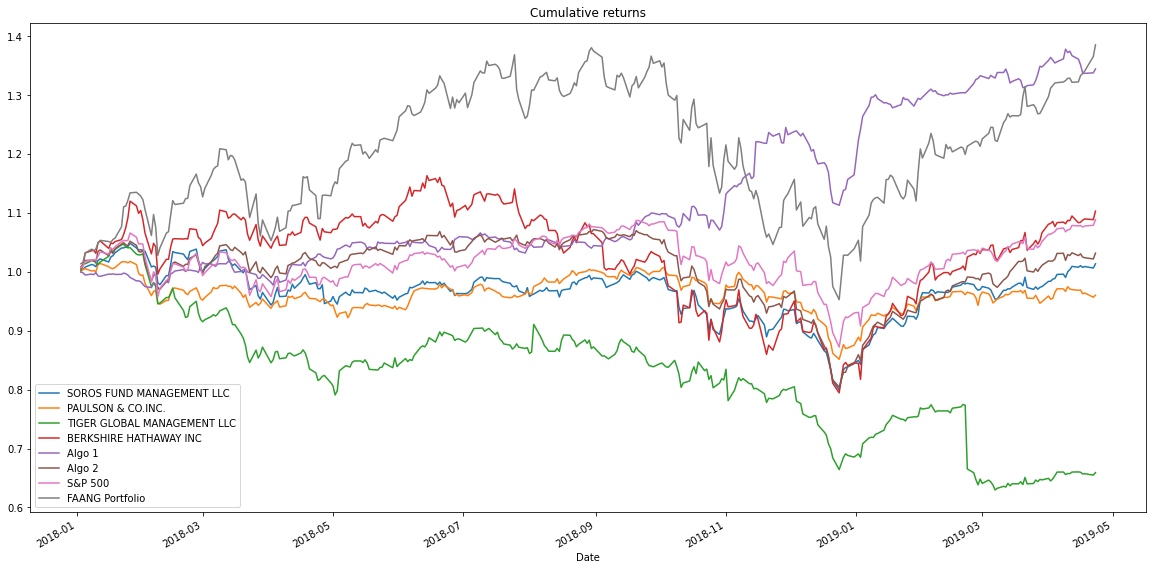

In [279]:
# Compute returns
#all_portfolios_daily_returns.cumsum()

all_portfolios_cumulative_returns = (1 + all_portfolios_daily_returns).cumprod()
all_portfolios_cumulative_returns.plot(kind='line', figsize=(20, 10), title="Cumulative returns")

initial_value = 100000
cumulative_profit = initial_value * cumulative_returns
print(f"Initial investment: {initial_value}  Final value:")
cumulative_profit.iloc[-1]

In [280]:
'''
On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Based on the Sharpe ratio, Algo 1 vastly out-performs the S&P 500. However Algo 2 underperforms the S&P 500. The results for other portfolios are a mixed bag, with several slightly below the S&P 500 and two with negative Sharpe Ratio values.
'''

"\nOn the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:\n\nBased on the Sharpe ratio, Algo 1 vastly out-performs the S&P 500. However Algo 2 underperforms the S&P 500. The results for other portfolios are a mixed bag, with several slightly below the S&P 500 and two with negative Sharpe Ratio values.\n"